<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Birdsong Tutorial</h1> </center>

# Define Objects

the following line enable interact with figures, you can make zoom and save images from a poup matplotlib window. Opciones: notebook, qt, ipympl, tk, qt, or widget

In [4]:
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

Define Path and Ploter objects

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "'

paths  = bs.Paths(root_path, audios_path, bird_name) 
plotter = bs.Plotter(save=True)   # to save figures save=True 
paths.ShowFiles();

Audios path: ../examples/audios
The folder has 2 songs:
574179401 - Zonotrichia Capensis.wav XC388622 - Ocellated Tapaculo - Acropternis orthonyx.mp3


Define, visualize and hear a birdsong object from the file number of the previous table. 
You can also define the interval time points with the function Plot but enabling the SelectTime_on option, this option does not work with pitch on

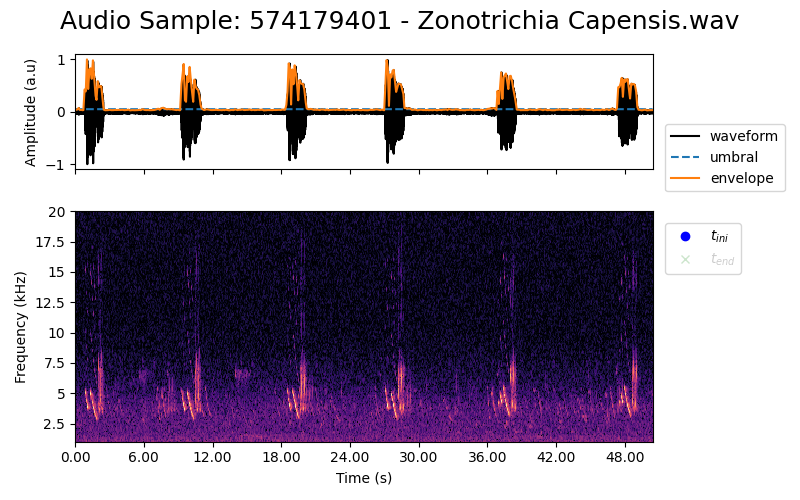

NameError: name 'AudioPlay' is not defined

In [3]:
birdsong = bs.BirdSong(paths, file_id="574179401",  umbral_FF=1.0, NN=512, flim=(1e3,20e3), # tlim=(5,7),
                       split_method="freq", Nt=5000, umbral=0.05)
plotter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

In [ ]:
# time_intervals = Positions(ploter.klicker)
time_intervals = np.array([[0.35362068, 0.49966724],
                           [0.65662832, 0.97055046],
                           [1.12231415, 1.3515189 ],
                           [1.43883499, 1.61502639],
                           [1.72105308, 1.87125755]])
print("You have selected {} syllables.".format(time_intervals.shape[0]))
[print(r"  - Syllable {}: t0 = {:.4f} s , tend = {:.4f} s".format(i, time_intervals[i,0], time_intervals[i,1])) for i in range(time_intervals.shape[0])];

Define, solve and plot a single syllable from the previous syllables defined

In [ ]:
%%time
syllable = bs.Syllable(birdsong, tlim=time_intervals[4], ide="syllable",
                       umbral_FF=0.5, Nt=30,  flim=(1e3,20e3), NN=birdsong.NN)
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [ ]:
syllable_synth = syllable.Solve(syllable.p)

ploter.Syllables(syllable, syllable_synth)
ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)
AudioPlay(syllable_synth)

# Optimization
Define the optimizer object

In [ ]:
method_kwargs = {'method':'brute', 'Ns':5} #, "workers":-1 
optimizer     = bs.Optimizer(birdsong, method_kwargs=method_kwargs)

Generate the whole synthetic birdsongs defined by the previous time intervals

In [ ]:
birdsong, synth_birdsong = optimizer.SongByTimes(time_intervals, NN=256)
Display(synth_birdsong.p)

In [ ]:
Display(birdsong.p)

In [ ]:
ploter.Plot(synth_birdsong)
# ploter.PlotAlphaBeta(synth_birdsong)

AudioPlay(synth_birdsong)

In [ ]:
ploter.Plot(birdsong)
AudioPlay(birdsong)

In [ ]:
birdsong.no_syllable = 1
ploter.Syllables(birdsong, synth_birdsong);

Visualize and hear the whole synthetic birdsong

In [ ]:
# %%time
synth_bird = synth_birdsong.SolveAB(synth_birdsong.alpha, synth_birdsong.beta, 3700)
# # synth = SolveAB(syll, synth_birdsong.alphas, synth_birdsong.betas, 3700)

In [ ]:
optimizer.optimal_gamma

In [ ]:
synth_birdsong.id = "synth-birdsong"
synth_bird.paths = paths
ploter.Result(birdsong, synth_bird)
# ploter.PlotVs(synth_bird)
AudioPlay(synth_bird)

Save the real and synthetic birdsongs as audio WAV files

In [ ]:
birdsong.WriteAudio();  synth_birdsong.WriteAudio();

In [ ]:
# optimizer.SmoothAB(time_intervals)

# plt.figure()
# # plt.plot(synth_birdsong.time_s, synth_birdsong.betas_smooth, 'o', ms=2, label="beta smooth")
# # plt.plot(synth_birdsong.time_s, synth_birdsong.alphas_smooth, 'o', ms=1, label="alpha smooth")

# plt.plot(synth_birdsong.time_s, synth_birdsong.betas, 'o', ms=2, label="betas")
# plt.plot(synth_birdsong.time_s, synth_birdsong.alphas, 'o', ms=1, label="alpha")

# plt.xlim((0,2.6)); plt.legend()
# plt.show()